In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [2]:
data = pd.read_csv('output.csv', header=None).dropna(axis=1).values.reshape(1000,)

## Statistics

In [3]:
mean = np.average(data)
mean

41.76605031329089

In [4]:
median = np.median(data)
median

31.12326993624469

In [5]:
first_quartile = np.quantile(data, .25)
first_quartile

14.522787128774127

In [6]:
third_quartile = np.quantile(data, .75)
third_quartile

61.47117262252552

In [7]:
W_l_than_fifteen = len(data[data <= 15])/1000
W_l_than_fifteen

0.257

In [8]:
W_l_than_twenty = len(data[data <= 20])/1000
W_l_than_twenty

0.362

In [9]:
W_l_than_thirty = len(data[data <= 30])/1000
W_l_than_thirty

0.49

In [10]:
W_g_than_forty = len(data[data > 40])/1000
W_g_than_forty

0.443

In [11]:
w5 = 60 
w6 = 75 
w7 = 100 

In [12]:
W_g_than_w5 = len(data[data > w5])/1000
W_g_than_w5

0.257

In [13]:
W_g_than_w6 = len(data[data > w6])/1000
W_g_than_w6

0.192

In [14]:
W_g_than_w7 = len(data[data > w7])/1000
W_g_than_w7

0.081

## Graph

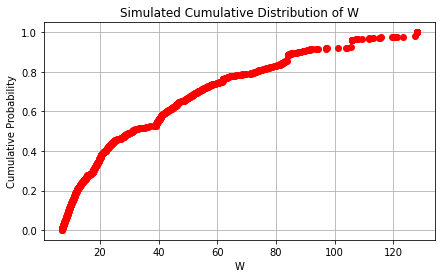

In [26]:
def cdf(value, data):
    return len(data[data <= value])/1000

probabilities = np.array([cdf(value, data) for value in data])
fig, ax = plt.subplots(figsize=(7,4))

ax.plot(data, probabilities, 'ro')
ax.set(title="Simulated Cumulative Distribution of W", xlabel="W", ylabel="Cumulative Probability")
plt.grid(True)
plt.savefig('Raw_data.png')

## Exponential Fit?

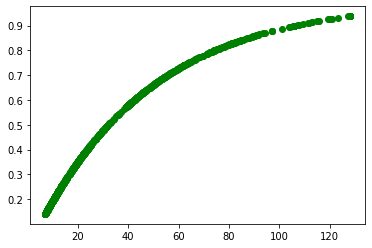

In [16]:
def fitted_cdf(val, lambd):
    return 1 - np.exp(-val/lambd)

results  = curve_fit(fitted_cdf, data, probabilities)

fitted_probabilites = fitted_cdf(data, results[0][0])

plt.plot(data, fitted_probabilites, 'go')


## Both

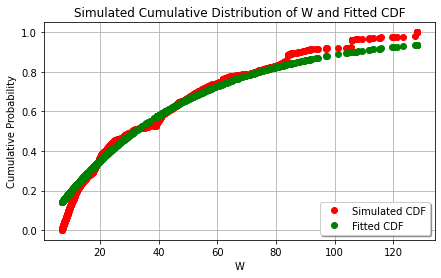

In [27]:
probabilities = np.array([cdf(value, data) for value in data])
fig, ax = plt.subplots(figsize=(7,4))

l1, = ax.plot(data, probabilities, 'ro')
l2, = ax.plot(data, fitted_probabilites, 'go')
ax.set(title="Simulated Cumulative Distribution of W and Fitted CDF", xlabel="W", ylabel="Cumulative Probability")
ax.legend((l1, l2), ('Simulated CDF', "Fitted CDF"), loc='lower right', shadow=True)
plt.grid(True)
plt.savefig('Raw_data_both.png')
